**Author : [Mochammad Arie Nugroho](https://github.com/arienugroho050396)**

## Import Library

In [1]:
# imports
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Read Data and Analysis

In [2]:
df = pd.read_csv('C:\My Files\Document\Coding\Datasheet\Mall_Customers.csv')

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.drop('CustomerID', axis=1, inplace = True)
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [66]:
#finding missing data
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.describe()

Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

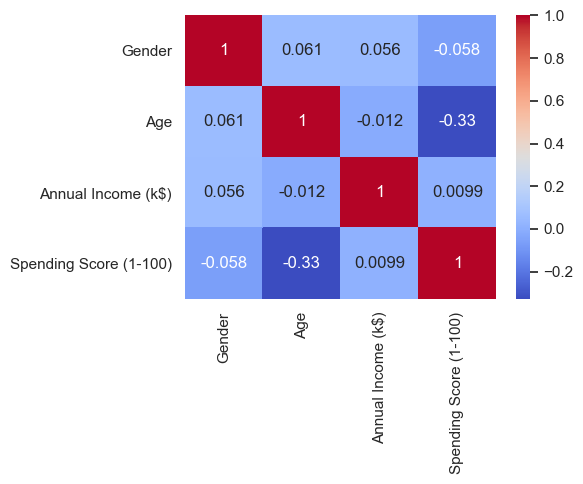

In [62]:
cor = df.corr()
sns.set(font_scale=1.0)
plt.figure(figsize=(6,5))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

<b>Insight</b><br>
It is clear from this correlation table that older customers have less income and therefore spend less money.

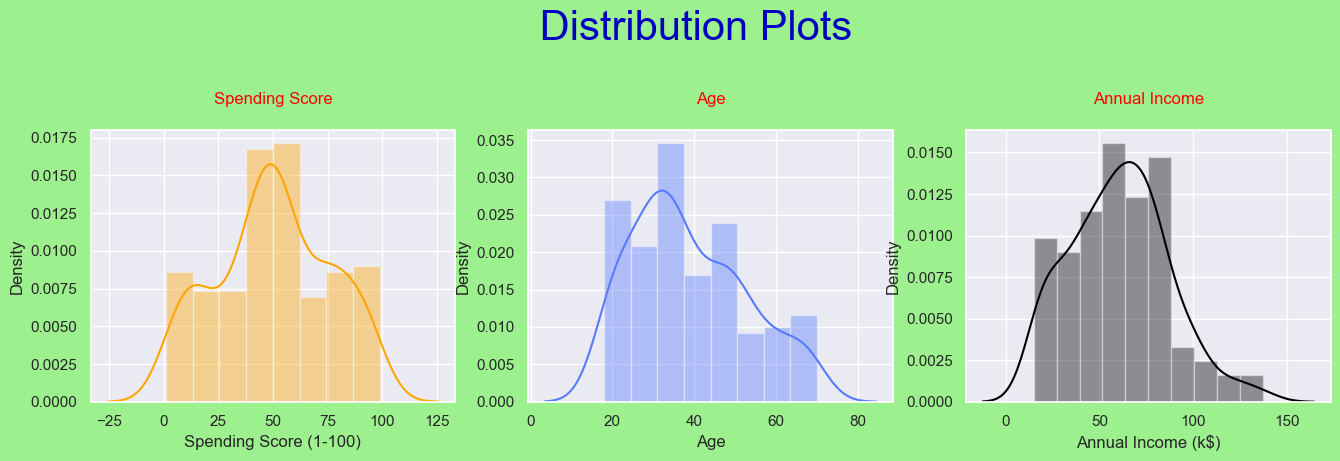

In [22]:
# -Distribution Plots-

plt.figure(figsize=(16,12),facecolor='#9DF08E')

# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color='#FF000B')
sns.distplot(df['Spending Score (1-100)'], color='orange')

# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='#FF000B')
sns.distplot(df['Age'], color='#577AFF')

# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='#FF000B')
sns.distplot(df['Annual Income (k$)'], color='black')

plt.suptitle(' Distribution Plots\n', color='#0000C1', size = 30)
plt.show()

<b>Insight</b><br>
The distributions are generally similar to the normal distribution, with only a few standard deviations. The 'more normal' distribution among the distributions is the 'Spending Score'. That's good because it's our target column.

In [23]:
# Before-After Label Encoder

from sklearn.preprocessing import LabelEncoder

print('\033[0;32m' + 'Before Label Encoder\n' + '\033[0m' + '\033[0;32m', df['Gender'])

le = LabelEncoder()
df['Gender'] = le.fit_transform(df.iloc[:,0])

print('\033[0;31m' + '\n\nAfter Label Encoder\n' + '\033[0m' + '\033[0;31m', df['Gender'])

Before Label Encoder
 0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object


After Label Encoder
 0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32


As you can see, we converted the 'Gender' column to numeric using the 'Label Encoder'.
<br>
Male --> 1 , Female -->0

In [24]:
# Let's look at the current state of our Data Frame.
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

In [25]:
# Let's calculate how much to shop for which gender

spending_score_male = 0
spending_score_female = 0

for i in range(len(df)):
    if df['Gender'][i] == 1:
        spending_score_male = spending_score_male + df['Spending Score (1-100)'][i]
    if df['Gender'][i] == 0:
        spending_score_female = spending_score_female + df['Spending Score (1-100)'][i]


print('\033[1m' + '\033[93m' + f'Males Spending Score  : {spending_score_male}')
print('\033[1m' + '\033[93m' + f'Females Spending Score: {spending_score_female}')

Males Spending Score  : 4269
Females Spending Score: 5771


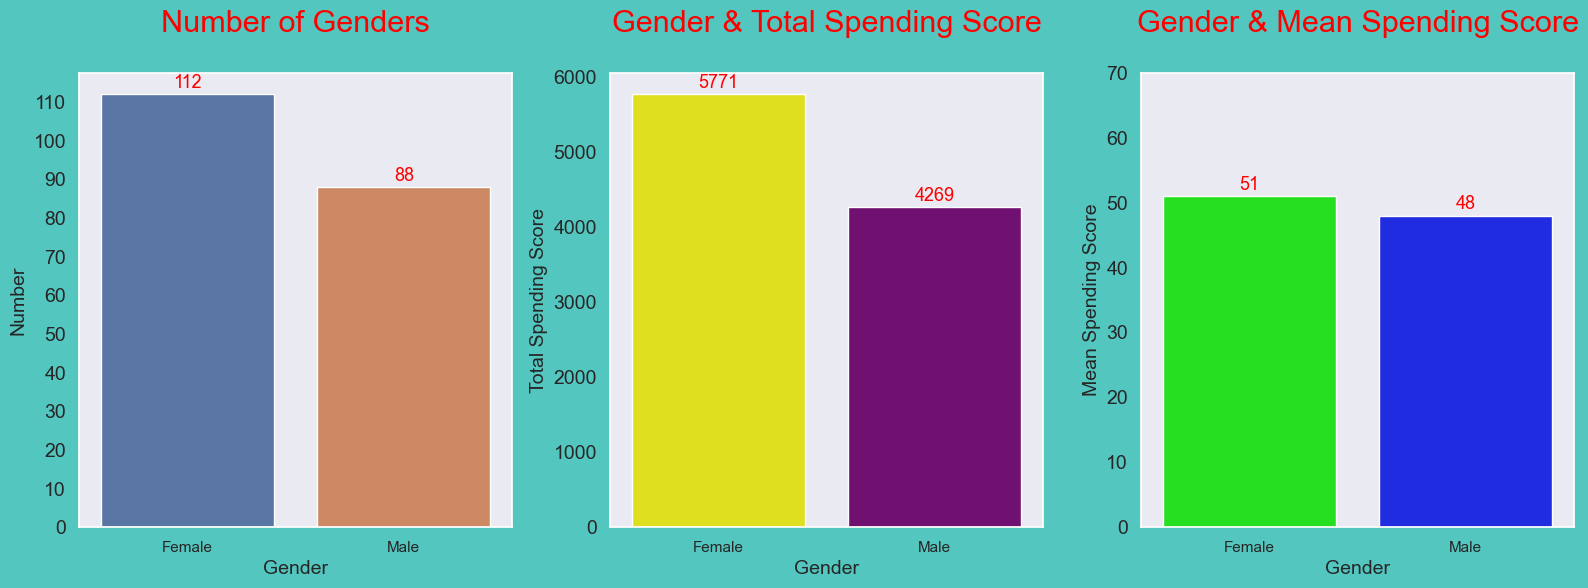

In [26]:
# Let's try to understand the relationship between gender and spending score.
 
# Number of genders
    
plt.figure(figsize=(16,16),facecolor='#54C6C0')
plt.subplot(3,3,1)
plots = sns.barplot(x=['Female','Male'], y=df['Gender'].value_counts(), data=df)  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Number", size=14)
plt.yticks(np.arange(0,116,10),size='14')
plt.grid(False)
plt.title("Number of Genders\n", color="red", size='22')



# Gender & Total Spending Score

list_genders_spending_score = [int(spending_score_female),int(spending_score_male)]
series_genders_spending_score = pd.Series(data = list_genders_spending_score)


plt.subplot(3,3,2)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score, palette=['yellow','purple'])  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Total Spending Score", size=14)
plt.yticks(np.arange(0,6001,1000),size='14')
plt.grid(False)
plt.title("Gender & Total Spending Score\n", color="red", size='22')



# Gender & Mean Spending Score 

list_genders_spending_score_mean = [int(spending_score_female/df['Gender'].value_counts()[0]),int(spending_score_male/df['Gender'].value_counts()[1])]
series_genders_spending_score_mean = pd.Series(data = list_genders_spending_score_mean)

plt.subplot(3,3,3)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score_mean, palette='hsv')  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Mean Spending Score", size=14)
plt.yticks(np.arange(0,71,10),size='14')
plt.grid(False)
plt.title("Gender & Mean Spending Score\n", color="red", size='22')
plt.tight_layout()
plt.show()

There is no significant difference in the mean spending scores of males and females. Since the mean spending scores are very close to each other, the difference between the total spending scores is the difference between the number of male and female customers, but this difference is not serious. Considering all this, it would be meaningless to choose a gender-based target audience.

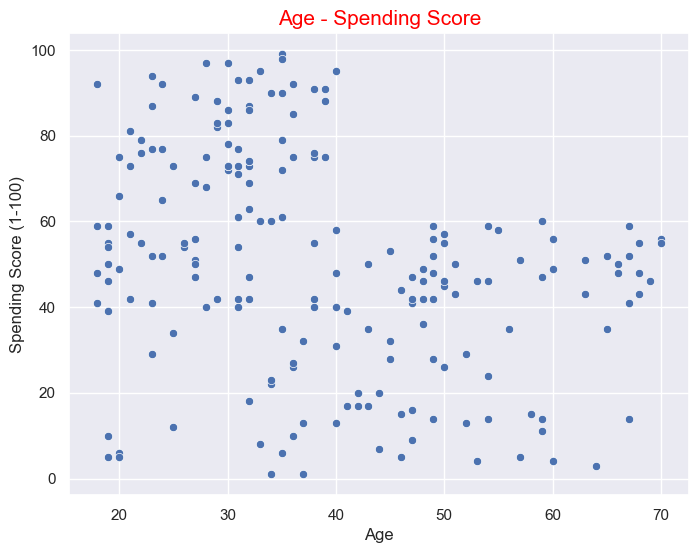

In [36]:
# Let's look at the relationship between Age and Spending score

plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'])
plt.title('Age - Spending Score', size = 15, color='red')
plt.show()

People between the ages of 20-40 have made more purchases, considering the inference we just made about women, we can make our target audience more specific.

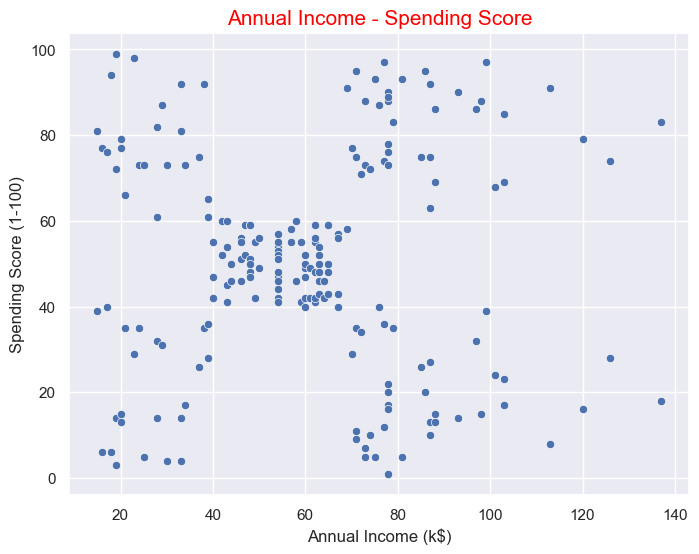

In [37]:
# Let's look at the relationship between Annual Income and Spending Score

plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], palette = "red")
plt.title('Annual Income - Spending Score', size = 15, color='red')
plt.show()

One of the two regions shown can be selected as the target audience. Even though the number of people whose annual income is between (40-60)k$ is higher (we understand this from the number of data points), the number of that audience is higher but the spending score is low, so if we make shopping attractive for them by choosing the target audience from the two regions above, we will see more profit can be made.

## PCA 

In [38]:
# x assignment
x = df.iloc[:,0:].values 
print("\033[1;31m"  + f'X data before PCA:\n {x[0:5]}')


# standardization before PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)


# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_2D = pca.fit_transform(X)
print("\033[0;32m" + f'\nX data after PCA:\n {X_2D[0:5,:]}')

X data before PCA:
 [[ 1 19 15 39]
 [ 1 21 15 81]
 [ 0 20 16  6]
 [ 0 23 16 77]
 [ 0 31 17 40]]

X data after PCA:
 [[-0.40638272 -0.52071363]
 [-1.42767287 -0.3673102 ]
 [ 0.05076057 -1.89406774]
 [-1.6945131  -1.63190805]
 [-0.31310838 -1.81048272]]


As you can see, X data, which we defined as 4 dimensional (red part), has now been reduced to 2 dimensions (green part) thanks to PCA.

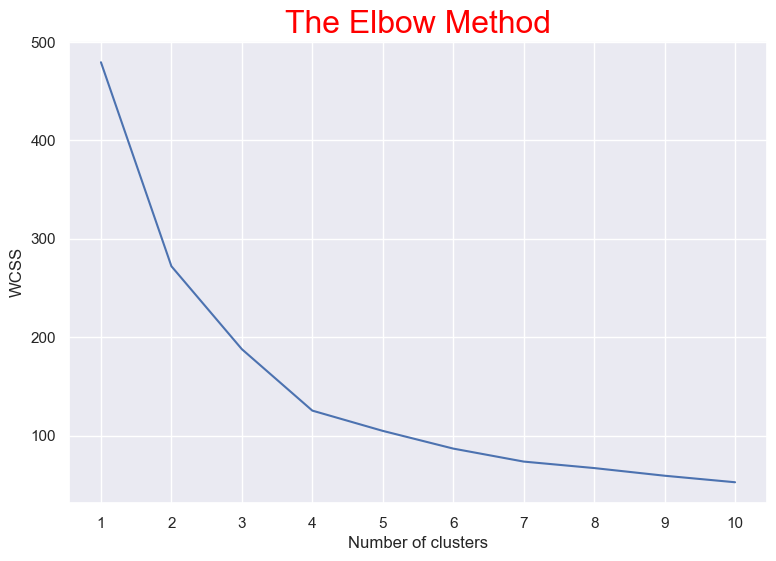

In [39]:
# finding optimum number of clusters
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(X_2D)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

'4' is optimum number of clusters. Because the most break in the chart is at that point. This is how we will select the next optimal n_clusters.

In [40]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X_2D)

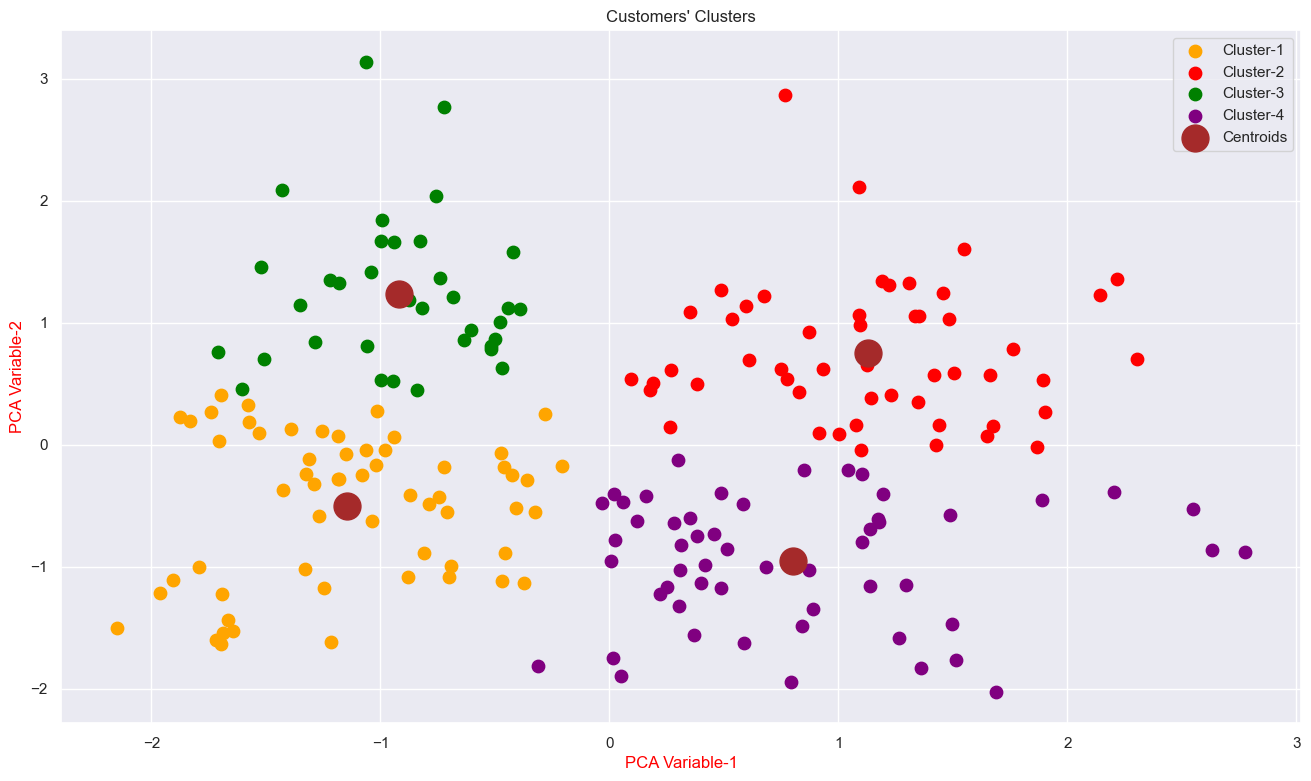

In [41]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X_2D[y_kmeans == 0, 0], X_2D[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(X_2D[y_kmeans == 1, 0], X_2D[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(X_2D[y_kmeans == 2, 0], X_2D[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster-3')
plt.scatter(X_2D[y_kmeans == 3, 0], X_2D[y_kmeans == 3, 1], s = 80, c = 'purple', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable-1', color='red')
plt.ylabel('PCA Variable-2', color='red')
plt.legend()
plt.show()

## Clustering (Age & Annual Income & Spending Score)

In [42]:
# x assignment
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values
x_df = df[['Age','Annual Income (k$)','Spending Score (1-100)']] # this line for 3d scatter plot

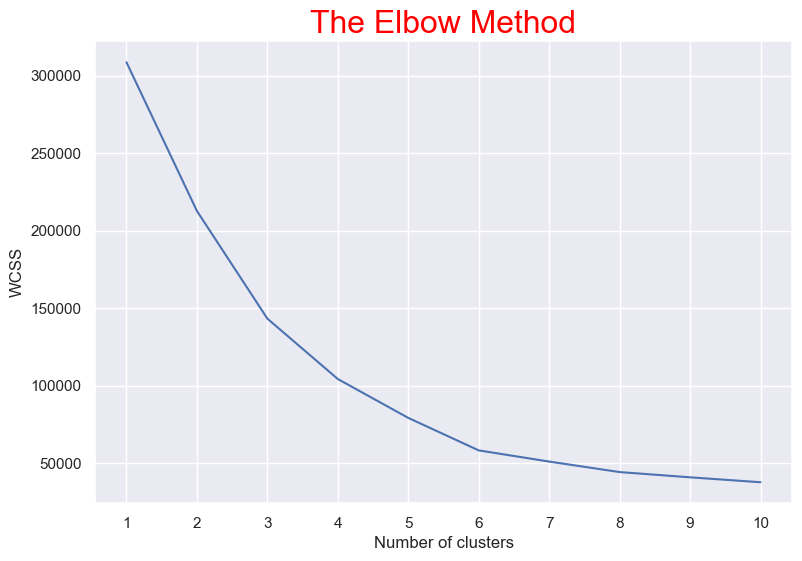

In [43]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

'6' is optimum number of clusters

In [44]:
# KMeans
kmeans = KMeans(n_clusters = 6, init ='k-means++', random_state=88)
clusters = kmeans.fit_predict(x_df)
x_df['label'] = clusters

In [45]:
# clusters visualization
fig = px.scatter_3d(data_frame=x_df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color = 'label', size = 'label')
fig.show()

3D visualization was used as there were 3 variables.

## Clustering (Age & Annual Income)

In [46]:
# x assignment
x = df[['Age','Annual Income (k$)']].values

In [47]:
# x assignment
x = df[['Age','Annual Income (k$)']].values

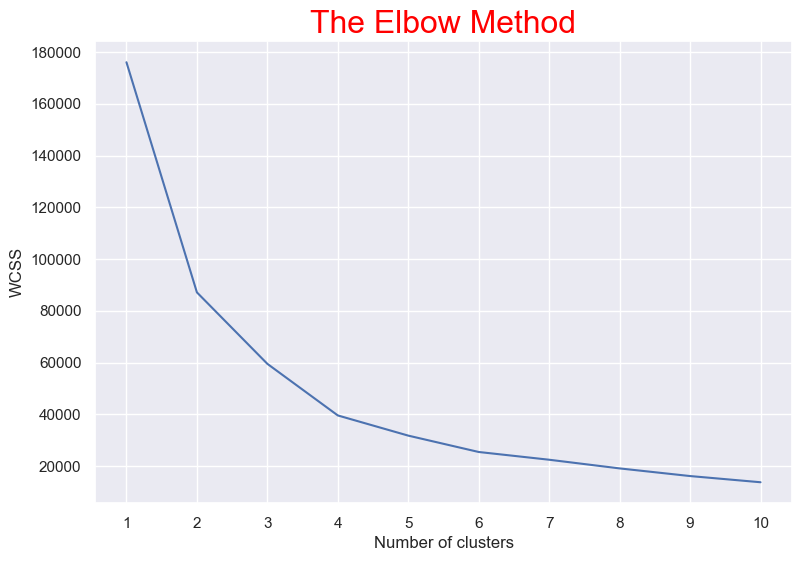

In [48]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()


'2' is optimum number of clusters.

In [49]:
# KMeans
kmeans = KMeans(n_clusters = 2, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

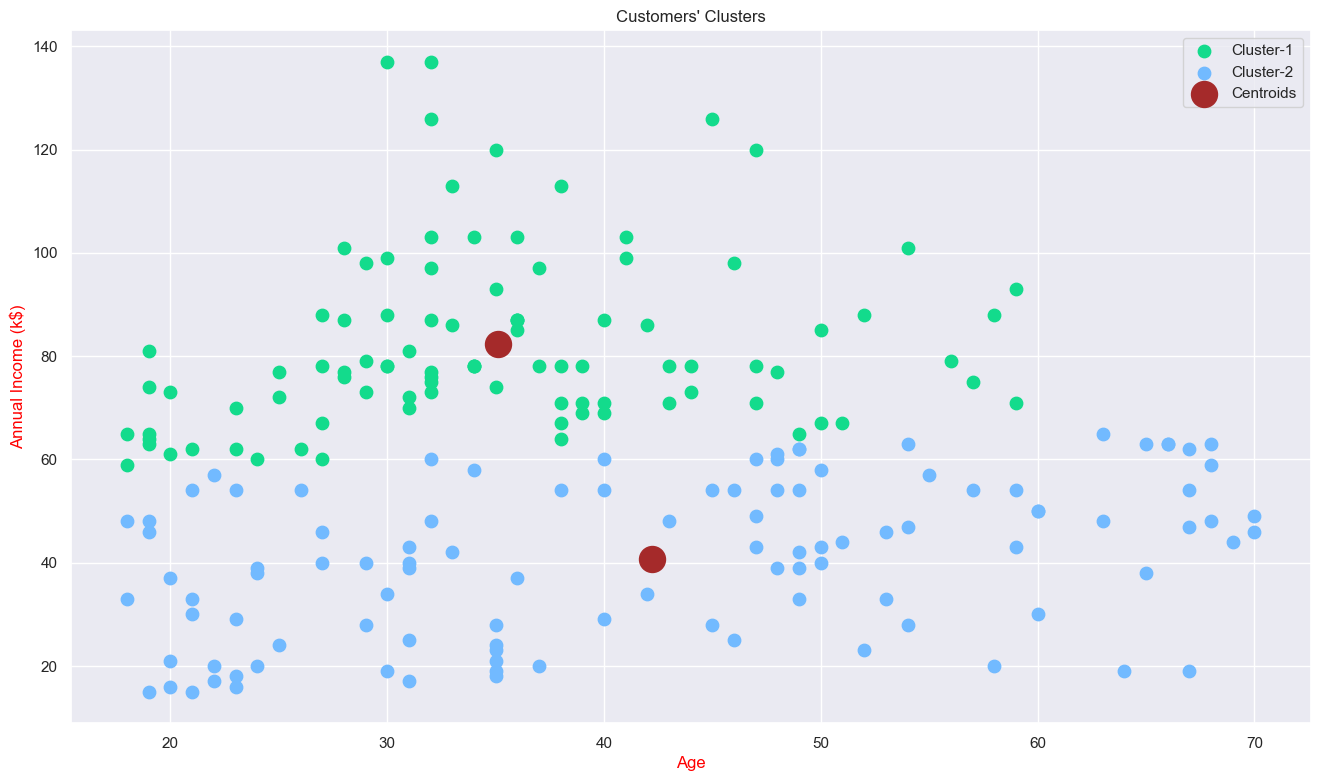

In [50]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = '#13DB8C', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = '#72BAFF', label = 'Cluster-2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 350, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Annual Income (k$)', color='red')
plt.legend()
plt.show()

## Clustering (Annual Income & Spending Score)

In [51]:
# x assignment
x = df[['Annual Income (k$)','Spending Score (1-100)']].values

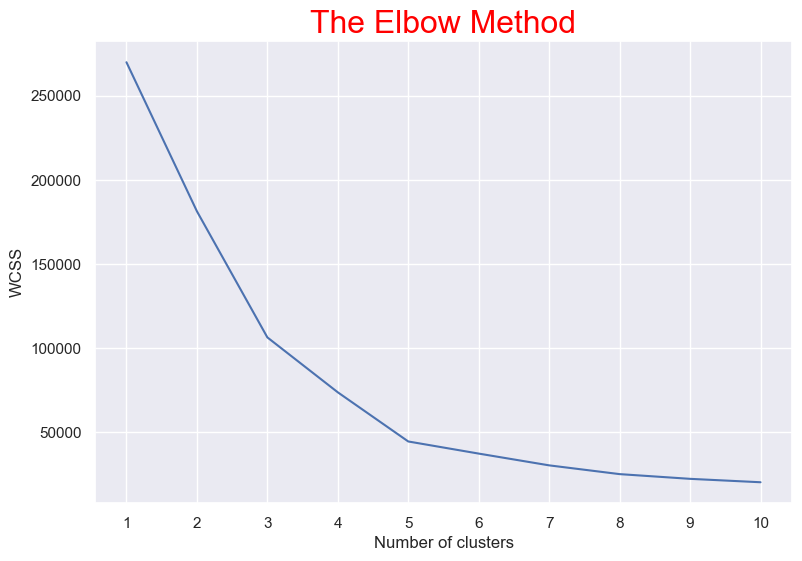

In [52]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

'5' is optimum number of clusters.

In [53]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

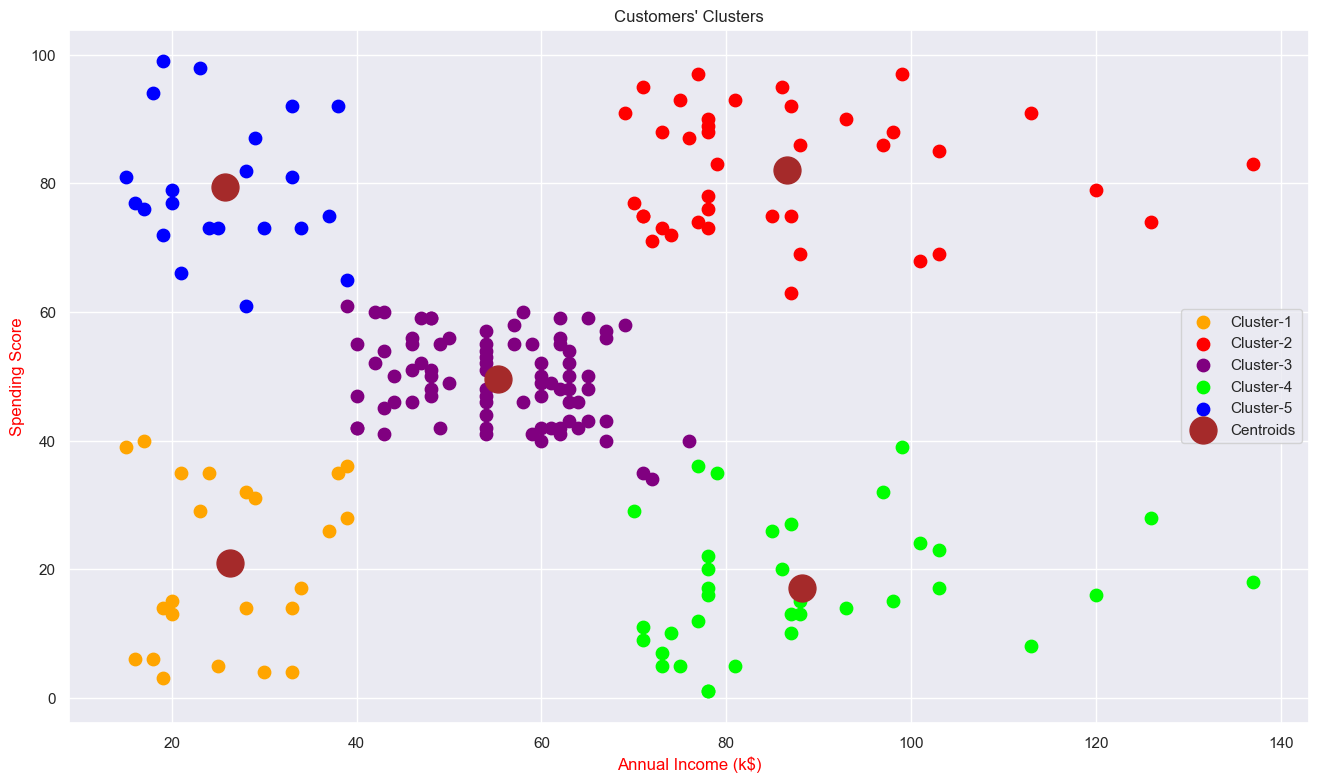

In [54]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'purple', label = 'Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = 'lime', label = 'Cluster-4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 80, c = 'blue', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Annual Income (k$)', color='red')
plt.ylabel('Spending Score', color='red')
plt.legend()
plt.show()

## Clustering (Age & Spending Score)

In [55]:
# x assignment
x = df[['Age','Spending Score (1-100)']].values

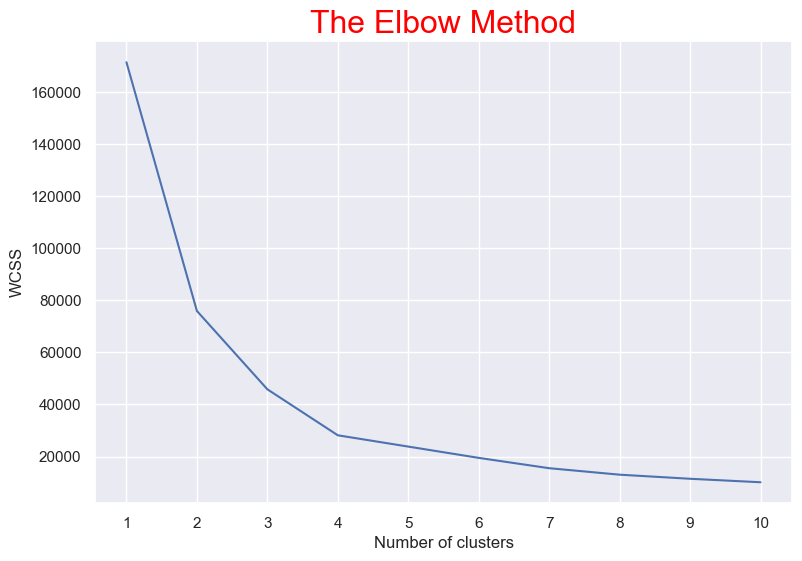

In [56]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

'4' is optimum number of clusters.

In [58]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

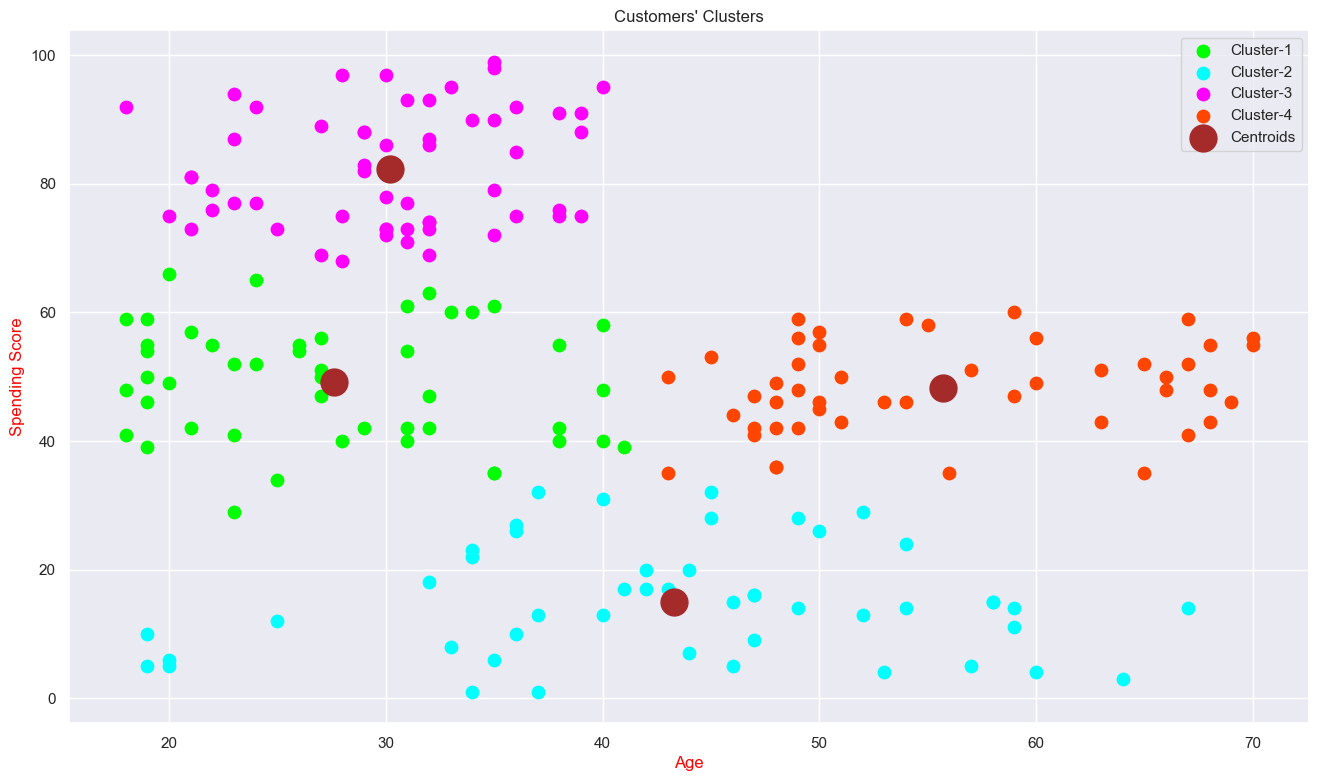

In [59]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = '#00FF00', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = '#00FFFF', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = '#FF00FF', label = 'Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = '#FF4500', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Spending Score', color='red')
plt.legend()
plt.show()